# Metadata Overview: EDA

In [2]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Read the metadata
file_path = "../manifest-1745037983505/metadata.csv"
metadata_df = pd.read_csv(file_path)

In [8]:
metadata_df.head()

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp,File Size (MB)
0,1.3.6.1.4.1.14519.5.2.1.99.1071.17468448140319...,COVID-19-NY-SBU,NO,https://doi.org/10.7937/TCIA.BBAG2923,A113004,1.3.6.1.4.1.14519.5.2.1.99.1071.42964349729833...,PET CT FDG IMAG SKULL TO THIGH,1900-10-30,PET WB AC,SIEMENS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,251,15.24 MB,./COVID-19-NY-SBU/A113004/10-30-1900-NA-PET CT...,2025-04-26 17:52:35.380,15.24
1,1.3.6.1.4.1.14519.5.2.1.99.1071.30234098161697...,COVID-19-NY-SBU,NO,https://doi.org/10.7937/TCIA.BBAG2923,A056396,1.3.6.1.4.1.14519.5.2.1.99.1071.18898244484379...,PET CT FDG IMAG SKULL TO THIGH,1901-04-09,PET AC,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,299,24.11 MB,./COVID-19-NY-SBU/A056396/04-09-1901-NA-PET CT...,2025-04-26 17:52:42.319,24.11
2,1.3.6.1.4.1.14519.5.2.1.99.1071.17485489156024...,COVID-19-NY-SBU,NO,https://doi.org/10.7937/TCIA.BBAG2923,A389295,1.3.6.1.4.1.14519.5.2.1.99.1071.15448604039589...,PET CT FDG IMAG SKULL TO THIGH,1900-09-29,PET AC,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,299,24.11 MB,./COVID-19-NY-SBU/A389295/09-29-1900-NA-PET CT...,2025-04-26 17:53:08.596,24.11
3,1.3.6.1.4.1.14519.5.2.1.99.1071.29461637259367...,COVID-19-NY-SBU,NO,https://doi.org/10.7937/TCIA.BBAG2923,A113004,1.3.6.1.4.1.14519.5.2.1.99.1071.42964349729833...,PET CT FDG IMAG SKULL TO THIGH,1900-10-30,CT WB 4.0 B30f,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,376,198.53 MB,./COVID-19-NY-SBU/A113004/10-30-1900-NA-PET CT...,2025-04-26 17:53:19.671,198.53
4,1.3.6.1.4.1.14519.5.2.1.99.1071.22933848075188...,COVID-19-NY-SBU,NO,https://doi.org/10.7937/TCIA.BBAG2923,A056396,1.3.6.1.4.1.14519.5.2.1.99.1071.18898244484379...,PET CT FDG IMAG SKULL TO THIGH,1901-04-09,WB STANDARD 2.5,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,390,206.34 MB,./COVID-19-NY-SBU/A056396/04-09-1901-NA-PET CT...,2025-04-26 17:53:42.291,206.34


In [15]:
# nuber of subject
num_subjects = metadata_df['Subject ID'].nunique()
print(f"Total unique Subjects: {num_subjects}")

Total unique Subjects: 46


In [16]:
# Number of study
num_studies = metadata_df['Study UID'].nunique()
print(f"Total unique Studies: {num_studies}")

Total unique Studies: 52


In [17]:
# number of series
num_series = metadata_df['Series UID'].nunique()
print(f"Total unique Series: {num_series}")

Total unique Series: 104


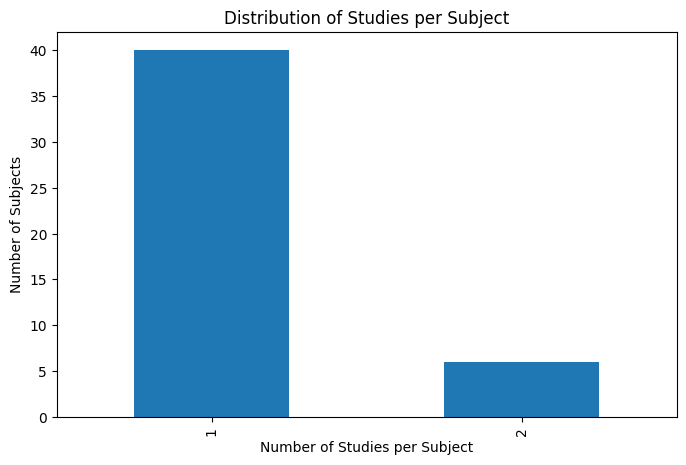

In [18]:
# Number of study of subject
subject_study_counts = metadata_df.groupby('Subject ID')['Study UID'].nunique()

plt.figure(figsize=(8,5))
subject_study_counts.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Studies per Subject')
plt.ylabel('Number of Subjects')
plt.title('Distribution of Studies per Subject')
plt.show()

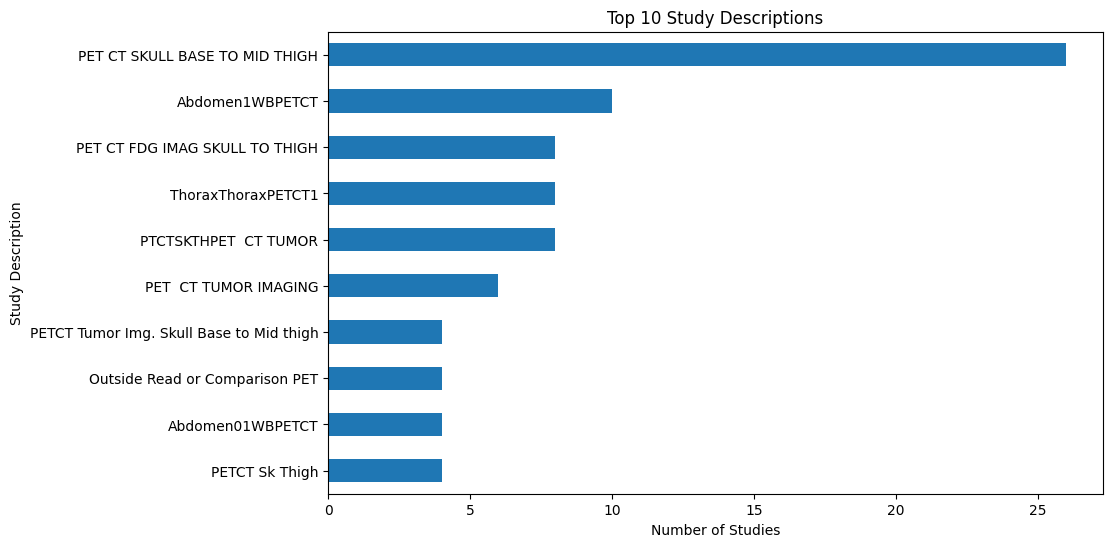

In [11]:
metadata_df['Study Description'] = metadata_df['Study Description'].str.replace('-', ' ', regex=False)
study_counts = metadata_df['Study Description'].value_counts().head(10)

plt.figure(figsize=(10,6))
study_counts.plot(kind='barh')
plt.xlabel('Number of Studies')
plt.ylabel('Study Description')
plt.title('Top 10 Study Descriptions')
plt.gca().invert_yaxis()  
plt.show()

In [13]:
study_counts

Series Description
PET WB             21
PET AC             10
HELICAL MODE        8
Abd.CT 5.0 B30s     6
WB2D AC             6
CT WHOLE BODY       5
AC 2D               5
CT 3.75 mm          5
STD CTAC            3
CT WB 5.0 B30s      3
Name: count, dtype: int64

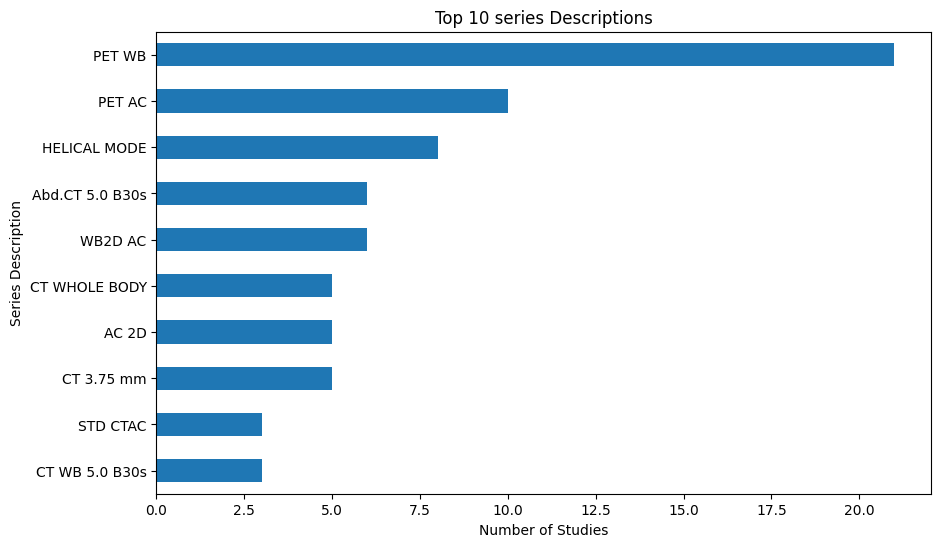

In [12]:
metadata_df['Series Description'] = metadata_df['Series Description'].str.replace('-', ' ', regex=False)
study_counts = metadata_df['Series Description'].value_counts().head(10)

plt.figure(figsize=(10,6))
study_counts.plot(kind='barh')
plt.xlabel('Number of Studies')
plt.ylabel('Series Description')
plt.title('Top 10 series Descriptions')
plt.gca().invert_yaxis()  
plt.show()

In [7]:
# Convert date fields to datetime
metadata_df['Study Date'] = pd.to_datetime(metadata_df['Study Date'], errors='coerce')
metadata_df['Download Timestamp'] = pd.to_datetime(metadata_df['Download Timestamp'], errors='coerce')

# Convert 'File Size' to MB
def parse_file_size(size_str):
    try:
        size_str = size_str.strip()
        if size_str.endswith("KB"):
            return float(size_str.replace("KB", "").strip()) / 1024
        elif size_str.endswith("MB"):
            return float(size_str.replace("MB", "").strip())
        elif size_str.endswith("GB"):
            return float(size_str.replace("GB", "").strip()) * 1024
        else:
            return np.nan
    except:
        return np.nan

metadata_df['File Size (MB)'] = metadata_df['File Size'].apply(parse_file_size)


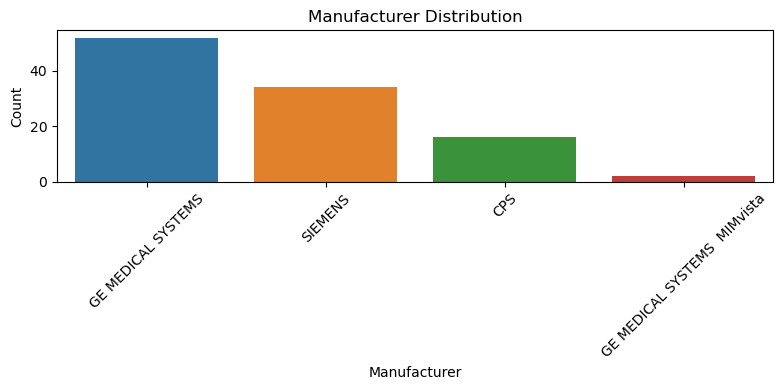

In [5]:
# Manufacturer Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=metadata_df, x='Manufacturer', order=metadata_df['Manufacturer'].value_counts().index)
plt.title("Manufacturer Distribution")
plt.ylabel("Count")
plt.xlabel("Manufacturer")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
study_image_counts = metadata_df.groupby('Study UID')['Number of Images'].sum()

In [22]:
study_image_counts

Study UID
1.3.6.1.4.1.14519.5.2.1.3023.4012.101052098274837556406391462169    622
1.3.6.1.4.1.14519.5.2.1.3023.4012.205426895588670773811563563443    622
1.3.6.1.4.1.14519.5.2.1.3023.4012.238886952279593116816069152414    710
1.3.6.1.4.1.14519.5.2.1.3023.4012.258947542510148098416558470862    622
1.3.6.1.4.1.14519.5.2.1.3023.4012.284223419484403837912532846061    534
1.3.6.1.4.1.14519.5.2.1.3023.4012.335111859020391296502453884146    634
1.3.6.1.4.1.14519.5.2.1.3023.4012.465474067785559397489269175756    534
1.3.6.1.4.1.14519.5.2.1.3023.4012.507148485748821590204034796320    622
1.3.6.1.4.1.14519.5.2.1.3023.4012.978270297885139177047710827729    534
1.3.6.1.4.1.14519.5.2.1.3344.4008.233811296314642551471614789062    430
1.3.6.1.4.1.14519.5.2.1.3983.4016.122782127942384243273235491827    534
1.3.6.1.4.1.14519.5.2.1.3983.4016.324995427785988223008924103576    534
1.3.6.1.4.1.14519.5.2.1.3983.9002.107656215131152599944682699489    534
1.3.6.1.4.1.14519.5.2.1.3983.9002.53975173550033774613

In [25]:
total_images = study_image_counts.sum()
total_images

30306

In [26]:
average_images_per_study = study_image_counts.mean()

In [27]:
average_images_per_study

582.8076923076923

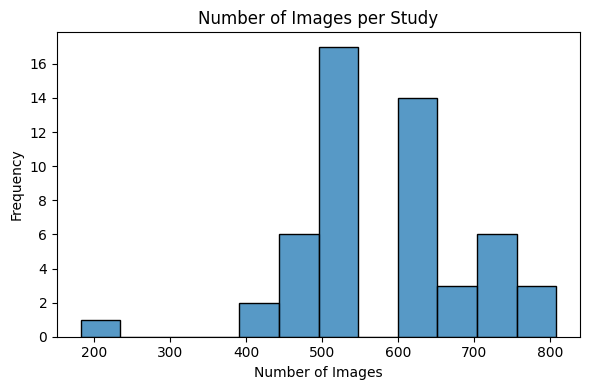

In [41]:
# Number of image per
study_image_counts = metadata_df.groupby('Study UID')['Number of Images'].sum()
plt.figure(figsize=(6, 4))
sns.histplot(study_image_counts)
plt.title("Number of Images per Study")
plt.xlabel("Number of Images")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

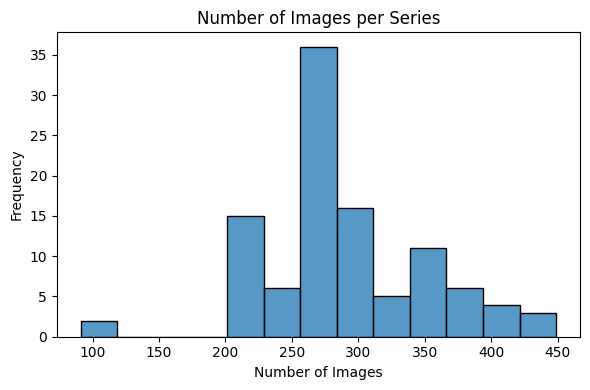

In [28]:
# Number of Images per Study
plt.figure(figsize=(6, 4))
sns.histplot(metadata_df['Number of Images'])
plt.title("Number of Images per Series")
plt.xlabel("Number of Images")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

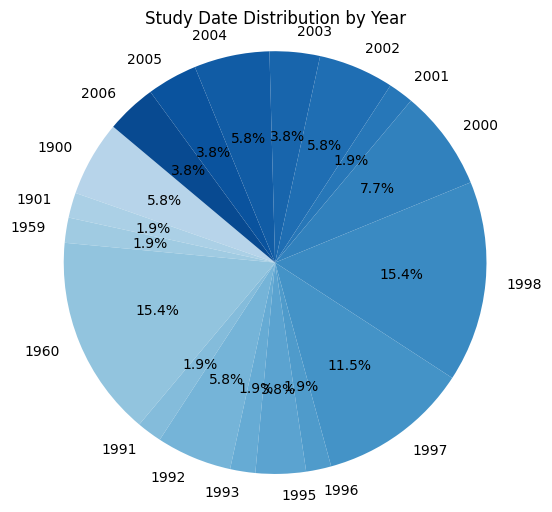

In [32]:
metadata_df['Study Date'] = pd.to_datetime(metadata_df['Study Date'], errors='coerce')
metadata_df['Study Year'] = metadata_df['Study Date'].dt.year
year_counts = metadata_df['Study Year'].value_counts().sort_index()
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(year_counts)))
plt.figure(figsize=(6,6))
plt.pie(year_counts, labels=year_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Study Date Distribution by Year')
plt.axis('equal')
plt.show()
plt.show()

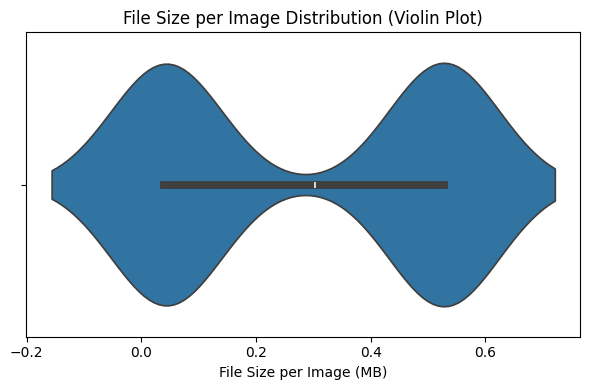

In [43]:
# Image Size Distribution (MB)
plt.figure(figsize=(6,4))
sns.violinplot(x=metadata_df['File Size per Image'])
plt.title("File Size per Image Distribution (Violin Plot)")
plt.xlabel("File Size per Image (MB)")
plt.tight_layout()
plt.show()
